In [5]:
!pip install pubchempy
from pubchempy import get_cids, get_compounds
from collections import Counter


import pubchempy as pcp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/ekaterinakostina/Downloads/data_practice.csv')

In [7]:
df.head(3)

,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,N#CC12CC1CO2,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,650.3290,...,0,0,0,0,0,0,0,0,0,0
1,COCC(O)C#CC=O,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,1808.5114,...,0,0,0,0,0,0,0,0,0,0
2,COC1C2CC(=NO)C12,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,1215.4323,...,0,0,0,0,0,0,0,0,0,0


In [9]:
duplicates = df.columns[df.T.duplicated()].tolist()
print("Дублирующиеся столбцы:", duplicates)

Дублирующиеся столбцы: ['MaxEStateIndex', 'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v', 'Chi4v', 'SMR_VSA8', 'SlogP_VSA12', 'SlogP_VSA7', 'SlogP_VSA9', 'EState_VSA11', 'VSA_EState10', 'fr_Ar_COO', 'fr_COO', 'fr_COO2', 'fr_C_O_noCOO', 'fr_C_S', 'fr_N_O', 'fr_Nhpyrrole', 'fr_SH', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_hdrzine', 'fr_hdrzone', 'fr_isocyan', 'fr_isothiocyan', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_para_hydroxylation', 'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene']


In [11]:
df1 = df.loc[:, ~df.T.duplicated()]# удаляем столбцы
df1.head(3)

,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,...,fr_phenol,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_term_acetylene,fr_tetrazole,fr_unbrch_alkane,fr_urea
0,N#CC12CC1CO2,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,650.3290,...,0,0,0,0,0,0,0,0,0,0
1,COCC(O)C#CC=O,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,1808.5114,...,0,0,0,0,0,0,0,0,0,0
2,COC1C2CC(=NO)C12,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,1215.4323,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df1= df1.drop(['smiles'], axis=1)#удаляем столбец 


In [15]:
df1.head(3)

,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,...,fr_phenol,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_term_acetylene,fr_tetrazole,fr_unbrch_alkane,fr_urea
0,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,650.3290,0.090625,...,0,0,0,0,0,0,0,0,0,0
1,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,1808.5114,0.131823,...,0,0,0,0,0,0,0,0,0,0
2,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,1215.4323,0.146098,...,0,0,0,0,0,0,0,0,0,0


In [17]:
disp = df1.var()# Вычислите дисперсию для каждого столбца
print(disp )

A                     1.807007
B                     0.207368
C                     0.112721
mu                    2.299563
alpha                63.592403
                       ...    
fr_quatN              0.010294
fr_term_acetylene     0.109567
fr_tetrazole          0.003190
fr_unbrch_alkane      0.013511
fr_urea               0.008528
Length: 184, dtype: float64


In [19]:
FILTER_THRESHOLD = 0.1

to_drop = [column for column in disp.index if disp[column] < FILTER_THRESHOLD] # Удалите столбцы с дисперсией меньше 0.1

df2 = df1.drop(to_drop, axis=1)
df2

,A,B,C,mu,alpha,r2,u0,u298,h298,g298,...,fr_aldehyde,fr_allylic_oxid,fr_amide,fr_bicyclic,fr_ether,fr_ketone,fr_ketone_Topliss,fr_nitrile,fr_piperdine,fr_term_acetylene
0,5.99438,2.27301,1.94738,4.5933,55.81,650.3290,-323.338627,-323.332830,-323.331885,-323.368166,...,0,0,0,1,1,0,0,1,0,0
1,2.32923,0.75737,0.59946,3.4068,77.34,1808.5114,-458.914682,-458.903948,-458.903004,-458.952489,...,1,0,0,0,1,0,0,0,0,0
2,2.71950,1.23126,1.02616,1.2920,76.75,1215.4323,-438.996978,-438.988148,-438.987204,-439.030829,...,0,0,0,1,1,0,0,0,0,0
3,2.29944,0.85305,0.65285,3.1488,79.50,1685.1071,-422.988608,-422.977883,-422.976938,-423.026195,...,1,0,0,0,1,0,0,0,0,1
4,3.03493,1.26316,0.90731,1.9135,77.81,1271.6972,-435.272093,-435.262958,-435.262014,-435.306724,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,0.78315,5.6157,77.77,1442.5369,-401.969669,-401.960439,-401.959495,-402.004365,...,1,0,0,0,0,0,0,1,0,0
4996,4.22393,1.23139,1.15079,1.2093,78.14,1141.0494,-403.082393,-403.074974,-403.074030,-403.114261,...,0,0,0,0,1,0,0,0,0,0
4997,2.40023,1.44261,1.26824,2.0425,81.95,1145.1258,-404.332161,-404.322884,-404.321940,-404.365564,...,0,0,0,1,0,0,0,0,1,0
4998,8.05652,1.25277,1.08801,4.1565,58.08,988.9973,-414.713710,-414.706937,-414.705993,-414.745694,...,0,0,0,0,1,0,0,0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler
cols = df1.columns
# Стандартизируйте данные
sc = StandardScaler()
X_std = sc.fit_transform(df1[cols].values)
X_std

array([[ 1.94455109,  1.91818951,  2.45854935, ..., -0.05665927,
        -0.08259966, -0.09313754],
       [-0.78226161, -1.41046755, -1.5566255 , ..., -0.05665927,
        -0.08259966, -0.09313754],
       [-0.491907  , -0.36970768, -0.28557447, ..., -0.05665927,
        -0.08259966, -0.09313754],
       ...,
       [-0.72943875,  0.09446038,  0.43553177, ..., -0.05665927,
        -0.08259966, -0.09313754],
       [ 3.47875011, -0.32246729, -0.10133611, ..., -0.05665927,
        -0.08259966, -0.09313754],
       [-0.44139049, -0.08321265, -0.44955703, ..., -0.05665927,
        -0.08259966, -0.09313754]])

In [23]:
FILTER_THRESHOLD = 0.9

# 1. Считаем матрицу корреляций
corr_matrix = df2.corr().abs()

# 2. Оставляем верхний треугольник
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Список столбцов для удаления
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > FILTER_THRESHOLD)]

# 4. Удаляем только существующие в df2
df2 = df2.drop(columns=[col for col in to_drop if col in df2.columns])

In [25]:
df2

,A,B,mu,alpha,r2,u0,cv,u0_atom,MaxAbsEStateIndex,MinEStateIndex,...,fr_NH2,fr_aldehyde,fr_allylic_oxid,fr_amide,fr_bicyclic,fr_ether,fr_ketone,fr_nitrile,fr_piperdine,fr_term_acetylene
0,5.99438,2.27301,4.5933,55.81,650.3290,-323.338627,21.459,-1226.756250,8.311944,-0.263889,...,0,0,0,0,1,1,0,1,0,0
1,2.32923,0.75737,3.4068,77.34,1808.5114,-458.914682,35.183,-1655.449691,9.588026,-0.847037,...,0,1,0,0,0,1,0,0,0,0
2,2.71950,1.23126,1.2920,76.75,1215.4323,-438.996978,32.710,-1694.820233,8.328809,0.371204,...,0,0,0,0,1,1,0,0,0,0
3,2.29944,0.85305,3.1488,79.50,1685.1071,-422.988608,36.895,-1838.172154,9.846767,-0.043009,...,0,1,0,0,0,1,0,0,0,1
4,3.03493,1.26316,1.9135,77.81,1271.6972,-435.272093,32.448,-1706.582262,7.125972,0.075231,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,5.6157,77.77,1442.5369,-401.969669,33.153,-1814.359442,10.285547,-0.059792,...,0,1,0,0,0,0,0,1,0,0
4996,4.22393,1.23139,1.2093,78.14,1141.0494,-403.082393,30.043,-1884.752147,5.502454,0.638843,...,0,0,0,0,0,1,0,0,0,0
4997,2.40023,1.44261,2.0425,81.95,1145.1258,-404.332161,36.045,-2041.141195,9.186319,-0.017407,...,0,0,0,0,1,0,0,0,1,0
4998,8.05652,1.25277,4.1565,58.08,988.9973,-414.713710,23.621,-1272.996133,9.590000,0.222222,...,0,0,0,0,0,1,0,0,0,0


In [37]:
y = df[['gap']]

In [39]:
x = df2

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)#выбор тестовых значений

In [48]:
from sklearn.preprocessing import MinMaxScaler #нормализациЯ

sc = MinMaxScaler(feature_range=(0, 1))
x_train = sc.fit_transform(x_train)#нормарование для х
x_test = sc.transform(x_test)

r2_score: 0.9180967603546971
Mean Absolute Error: 0.010252855000000003
Mean Squared Error: 0.00018747517061500012
Root Mean Squared Error: 0.013692157266661821
RandomForestRegressor()
r_score: 0.9581736587668735
r2_score: 0.9871843406219563
Mean Absolute Error: 0.0037865707500000043
Mean Squared Error: 2.9208980568750064e-05
Root Mean Squared Error: 0.0054045333349652
RandomForestRegressor()
r_score: 0.9935715075534102


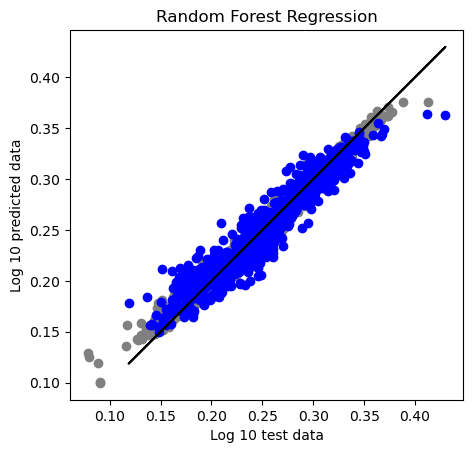

In [87]:
regressor = RandomForestRegressor()#это гипер параметр, если не знаем, то 0
regressor.fit(x_train, y_train)# тренировка сети
y_pred = regressor.predict(x_test)# проверка модели на тестовых
y1_pred = regressor.predict(x_train) #проверка на тренировочных


# metrics базовые настройки в регрессии


print('r2_score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_train, y1_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_train, y1_pred)))
plt.scatter(y_train, y1_pred, color='gray')
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='black')
plt.title('Random Forest Regression')
plt.xlabel('Log 10 test data')
plt.ylabel('Log 10 predicted data')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

r2_score: 0.14224024245426803
Mean Absolute Error: 0.03660544919032559
Mean Squared Error: 0.001963397999749202
Root Mean Squared Error: 0.04431024711902656
SVR()
r_score: 0.3771475075540975
r2_score: 0.17946737480568364
Mean Absolute Error: 0.03621622804665934
Mean Squared Error: 0.0018701278489335657
Root Mean Squared Error: 0.04324497484024665
SVR()
r_score: 0.42363589886326164


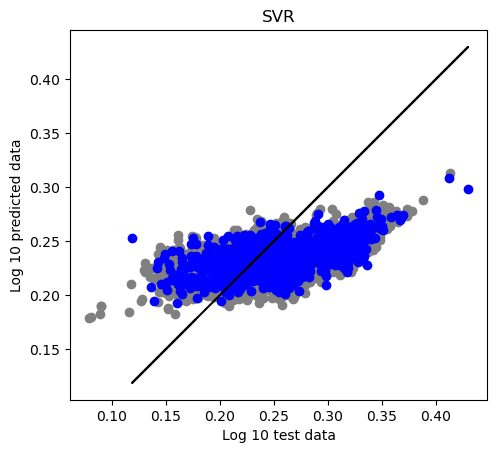

In [73]:
from sklearn.svm import SVR

regressor = SVR()#это гипер параметр, если не знаем, то 0
regressor.fit(x_train, y_train)# тренировка сети
y_pred = regressor.predict(x_test)# проверка модели на тестовых
y1_pred = regressor.predict(x_train) #проверка на тренировочных


# metrics базовые настройки в регрессии


print('r2_score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_train, y1_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_train, y1_pred)))
plt.scatter(y_train, y1_pred, color='gray')
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='black')
plt.title('SVR')
plt.xlabel('Log 10 test data')
plt.ylabel('Log 10 predicted data')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

r2_score: 0.8617145089961765
Mean Absolute Error: 0.013644968289991581
Mean Squared Error: 0.0003165332181217041
Root Mean Squared Error: 0.017791380444521557
LinearRegression()
r_score: 0.9282857905818533
r2_score: 0.884187011212114
Mean Absolute Error: 0.012547244734920292
Mean Squared Error: 0.00026395671415157363
Root Mean Squared Error: 0.016246744724761748
LinearRegression()
r_score: 0.9403121881652465


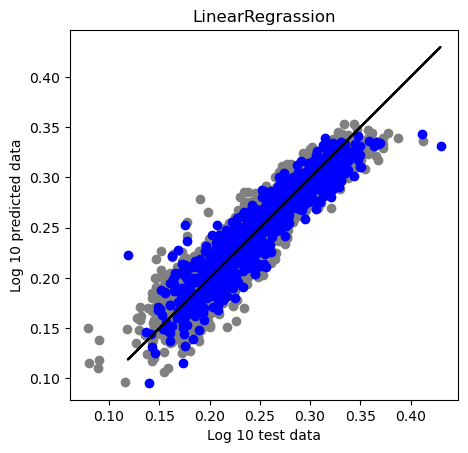

In [81]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()#это гипер параметр, если не знаем, то 0
regressor.fit(x_train, y_train)# тренировка сети
y_pred = regressor.predict(x_test)# проверка модели на тестовых
y1_pred = regressor.predict(x_train) #проверка на тренировочных


# metrics базовые настройки в регрессии


print('r2_score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_train, y1_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_train, y1_pred)))
plt.scatter(y_train, y1_pred, color='gray')
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='black')
plt.title('LinearRegrassion')
plt.xlabel('Log 10 test data')
plt.ylabel('Log 10 predicted data')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [91]:
print(regressor)

RandomForestRegressor()


In [93]:
rf = RandomForestRegressor() #!!название оптимизированной модели

In [112]:
# Define the dictionary 'params_rf' определяем параметры кторые хотим оптимизировать
params_rf = { #функция нормализации
 'min_samples_leaf': [2, 5, 7,10], 
 'n_estimators': [100,200, 350],
 }

# Import GridSearchCV модель для оптимизации
from sklearn.model_selection import GridSearchCV
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error', #на основании чего он понимает что модель лучше
                       cv=3,
                       verbose=1,
                       n_jobs=-1) 

In [114]:
import warnings
warnings.filterwarnings("ignore")
# Fit with train set
grid_rf.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [2, 5, 7, 10],
                         'n_estimators': [100, 200, 350]},
             scoring='neg_mean_squared_error', verbose=1)

In [116]:
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator вывести лучшую модель 
best_model = grid_rf.best_estimator_

# Predict test set labels предсказать на лучшей модели
y_pred = best_model.predict(x_test)

# Compute rmse_test вывести ошибку
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

Test RMSE of best model: 0.014


r2_score: 0.9176068136999278
Mean Absolute Error: 0.010321483163202671
Mean Squared Error: 0.00018859665046235303
Root Mean Squared Error: 0.013733049568917787
RandomForestRegressor()
r_score: 0.9579179577082412
r2_score: 0.98319223849996
Mean Absolute Error: 0.00412358079230571
Mean Squared Error: 3.8307633230323474e-05
Root Mean Squared Error: 0.006189316055132705
RandomForestRegressor()
r_score: 0.9915605067266243


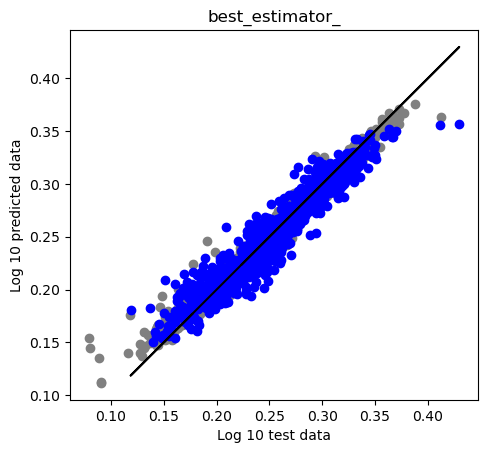

In [117]:
y_pred = best_model.predict(x_test)# проверка модели на тестовых
y1_pred = best_model.predict(x_train) #проверка на тренировочных


# metrics базовые настройки в регрессии


print('r2_score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_train, y1_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_train, y1_pred)))
plt.scatter(y_train, y1_pred, color='gray')
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='black')
plt.title('best_estimator_')
plt.xlabel('Log 10 test data')
plt.ylabel('Log 10 predicted data')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [121]:
!pip install shap

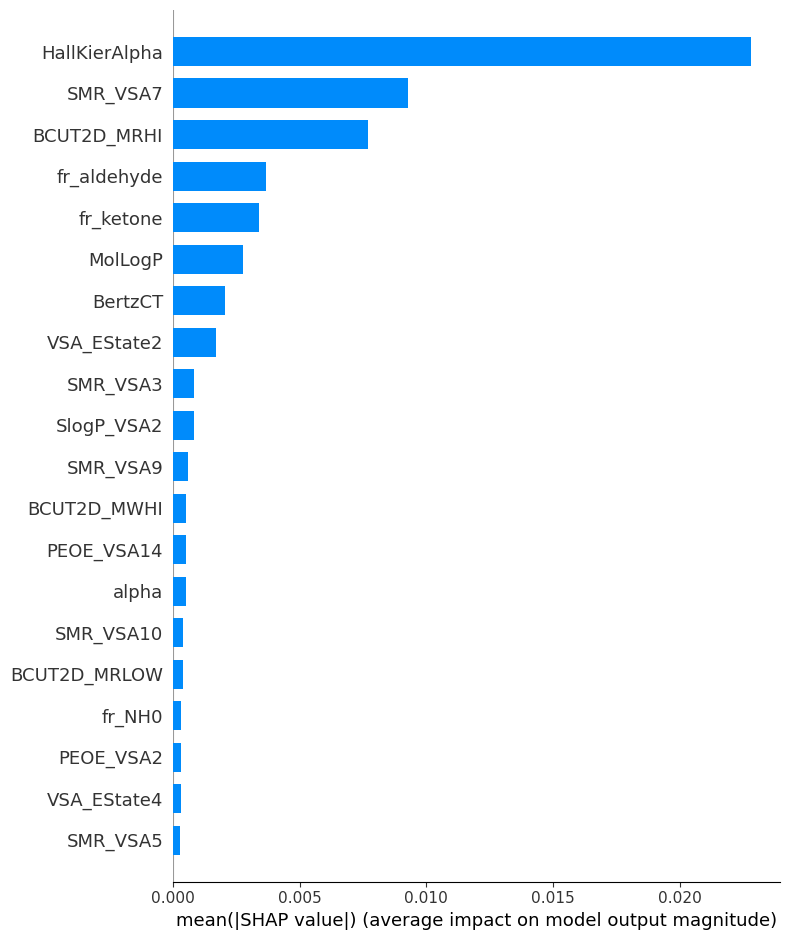

In [133]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_test)
f, ax = plt.subplots(figsize=(13, 10))
shap.summary_plot(shap_values, x, plot_type="bar")


In [146]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

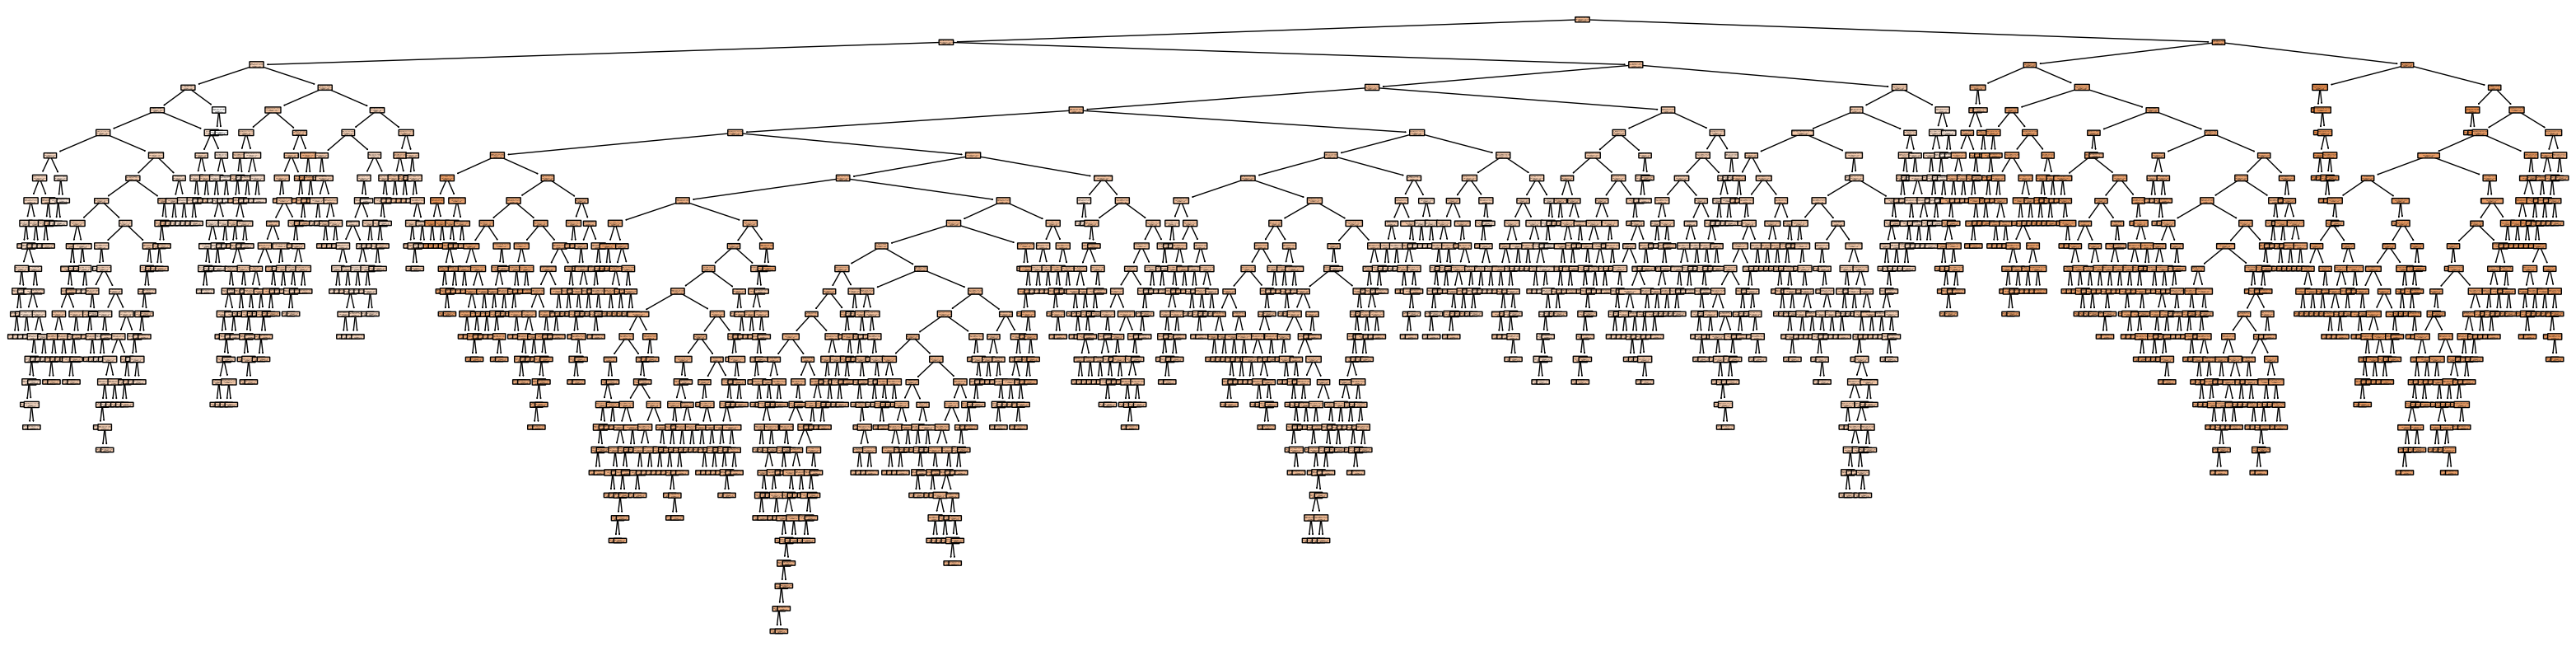

In [164]:
col= x.columns.values.tolist()
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(40, 10))
plot_tree(best_model.estimators_[0],
          feature_names=col,
          filled=True, impurity=True,
          rounded=True)
fig.figure.savefig('/Users/ekaterinakostina/Desktop/Гера/tree.jpeg', dpi=1000)